In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('Steel_industry_data.csv')
df.head()

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
0,01/01/2018 00:15,3.17,2.95,0.0,0.0,73.21,100.0,900,Weekday,Monday,Light_Load
1,01/01/2018 00:30,4.00,4.46,0.0,0.0,66.77,100.0,1800,Weekday,Monday,Light_Load
2,01/01/2018 00:45,3.24,3.28,0.0,0.0,70.28,100.0,2700,Weekday,Monday,Light_Load
3,01/01/2018 01:00,3.31,3.56,0.0,0.0,68.09,100.0,3600,Weekday,Monday,Light_Load
4,01/01/2018 01:15,3.82,4.50,0.0,0.0,64.72,100.0,4500,Weekday,Monday,Light_Load


In [ ]:
df.isnull().sum()

,0
date,0
Usage_kWh,0
Lagging_Current_Reactive.Power_kVarh,0
Leading_Current_Reactive_Power_kVarh,0
CO2(tCO2),0
Lagging_Current_Power_Factor,0
Leading_Current_Power_Factor,0
NSM,0
WeekStatus,0
Day_of_week,0


In [ ]:
df.dtypes

,0
date,object
Usage_kWh,float64
Lagging_Current_Reactive.Power_kVarh,float64
Leading_Current_Reactive_Power_kVarh,float64
CO2(tCO2),float64
Lagging_Current_Power_Factor,float64
Leading_Current_Power_Factor,float64
NSM,int64
WeekStatus,object
Day_of_week,object


In [ ]:
df['date_time'] = pd.to_datetime(df['date'],dayfirst=True)
df['hour'] = df['date_time'].dt.hour
df['day'] = df['date_time'].dt.day
df['month'] = df['date_time'].dt.month
df['weekday'] = df['date_time'].dt.weekday


In [ ]:
df.head(200)

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type,date_time,hour,day,month,weekday
0,01/01/2018 00:15,3.17,2.95,0.0,0.0,73.21,100.0,900,Weekday,Monday,Light_Load,2018-01-01 00:15:00,0,1,1,0
1,01/01/2018 00:30,4.00,4.46,0.0,0.0,66.77,100.0,1800,Weekday,Monday,Light_Load,2018-01-01 00:30:00,0,1,1,0
2,01/01/2018 00:45,3.24,3.28,0.0,0.0,70.28,100.0,2700,Weekday,Monday,Light_Load,2018-01-01 00:45:00,0,1,1,0
3,01/01/2018 01:00,3.31,3.56,0.0,0.0,68.09,100.0,3600,Weekday,Monday,Light_Load,2018-01-01 01:00:00,1,1,1,0
4,01/01/2018 01:15,3.82,4.50,0.0,0.0,64.72,100.0,4500,Weekday,Monday,Light_Load,2018-01-01 01:15:00,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,03/01/2018 01:00,4.57,4.61,0.0,0.0,70.40,100.0,3600,Weekday,Wednesday,Light_Load,2018-01-03 01:00:00,1,3,1,2
196,03/01/2018 01:15,4.64,4.46,0.0,0.0,72.10,100.0,4500,Weekday,Wednesday,Light_Load,2018-01-03 01:15:00,1,3,1,2
197,03/01/2018 01:30,4.64,4.57,0.0,0.0,71.25,100.0,5400,Weekday,Wednesday,Light_Load,2018-01-03 01:30:00,1,3,1,2
198,03/01/2018 01:45,4.61,4.79,0.0,0.0,69.34,100.0,6300,Weekday,Wednesday,Light_Load,2018-01-03 01:45:00,1,3,1,2


In [ ]:
df = pd.get_dummies(df, columns=['Load_Type', 'WeekStatus','Day_of_week'], drop_first=True)


In [ ]:
df = df.drop(columns=['date_time','date'])
df = df.drop(columns=['CO2(tCO2)','Lagging_Current_Reactive.Power_kVarh'])

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop('Usage_kWh',axis=1)
y = df['Usage_kWh']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)

X_train = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_train.columns)

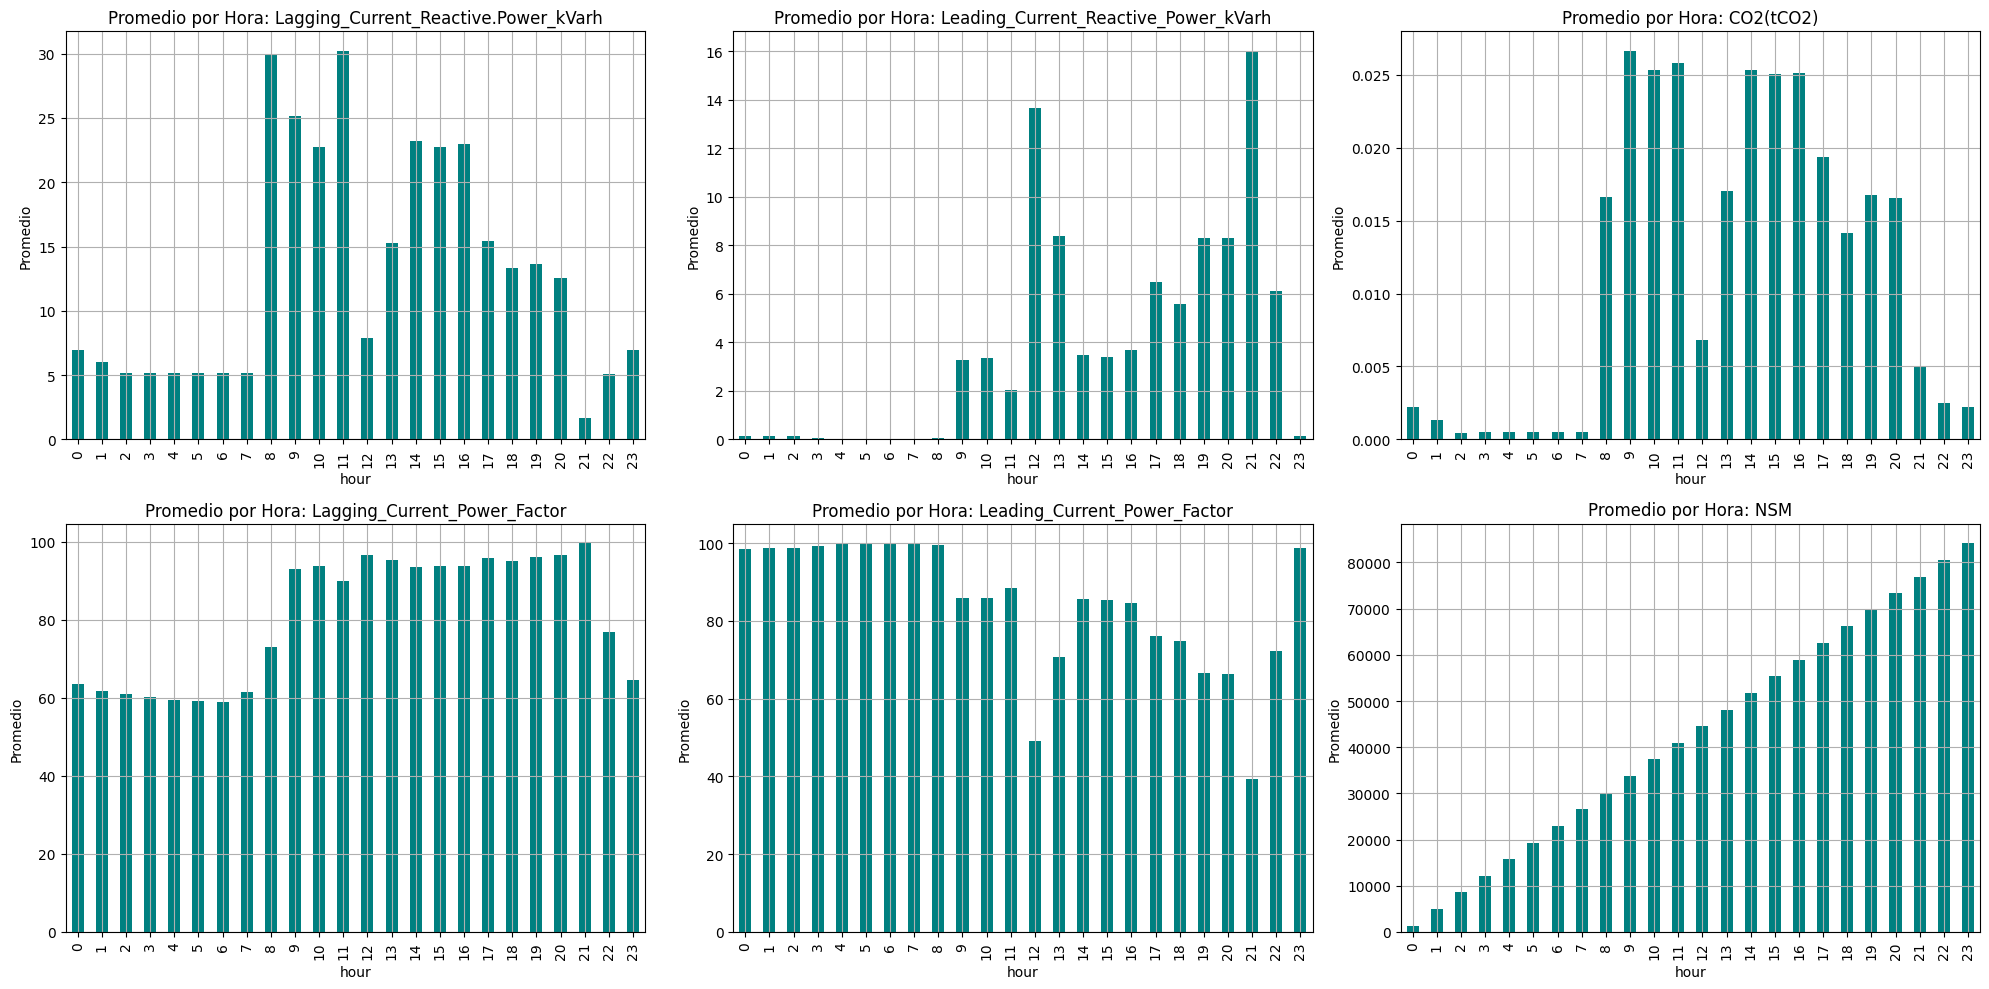

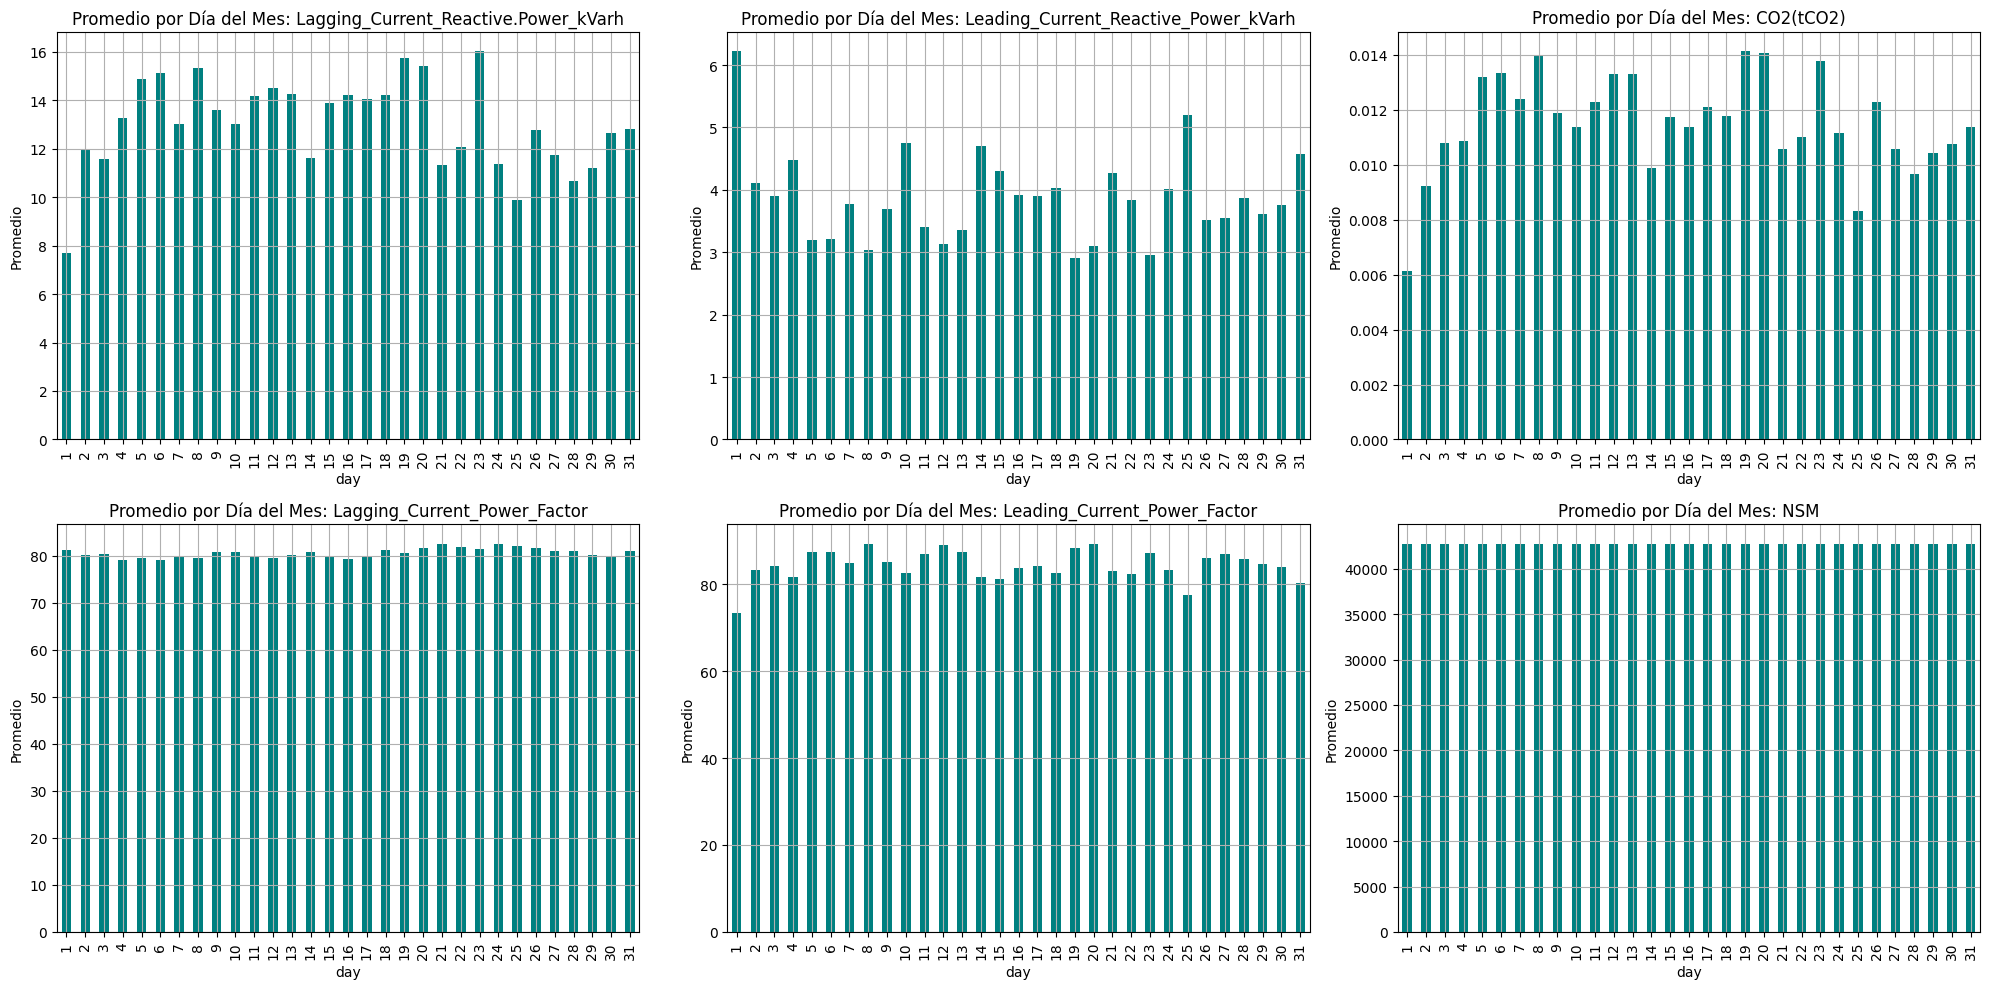

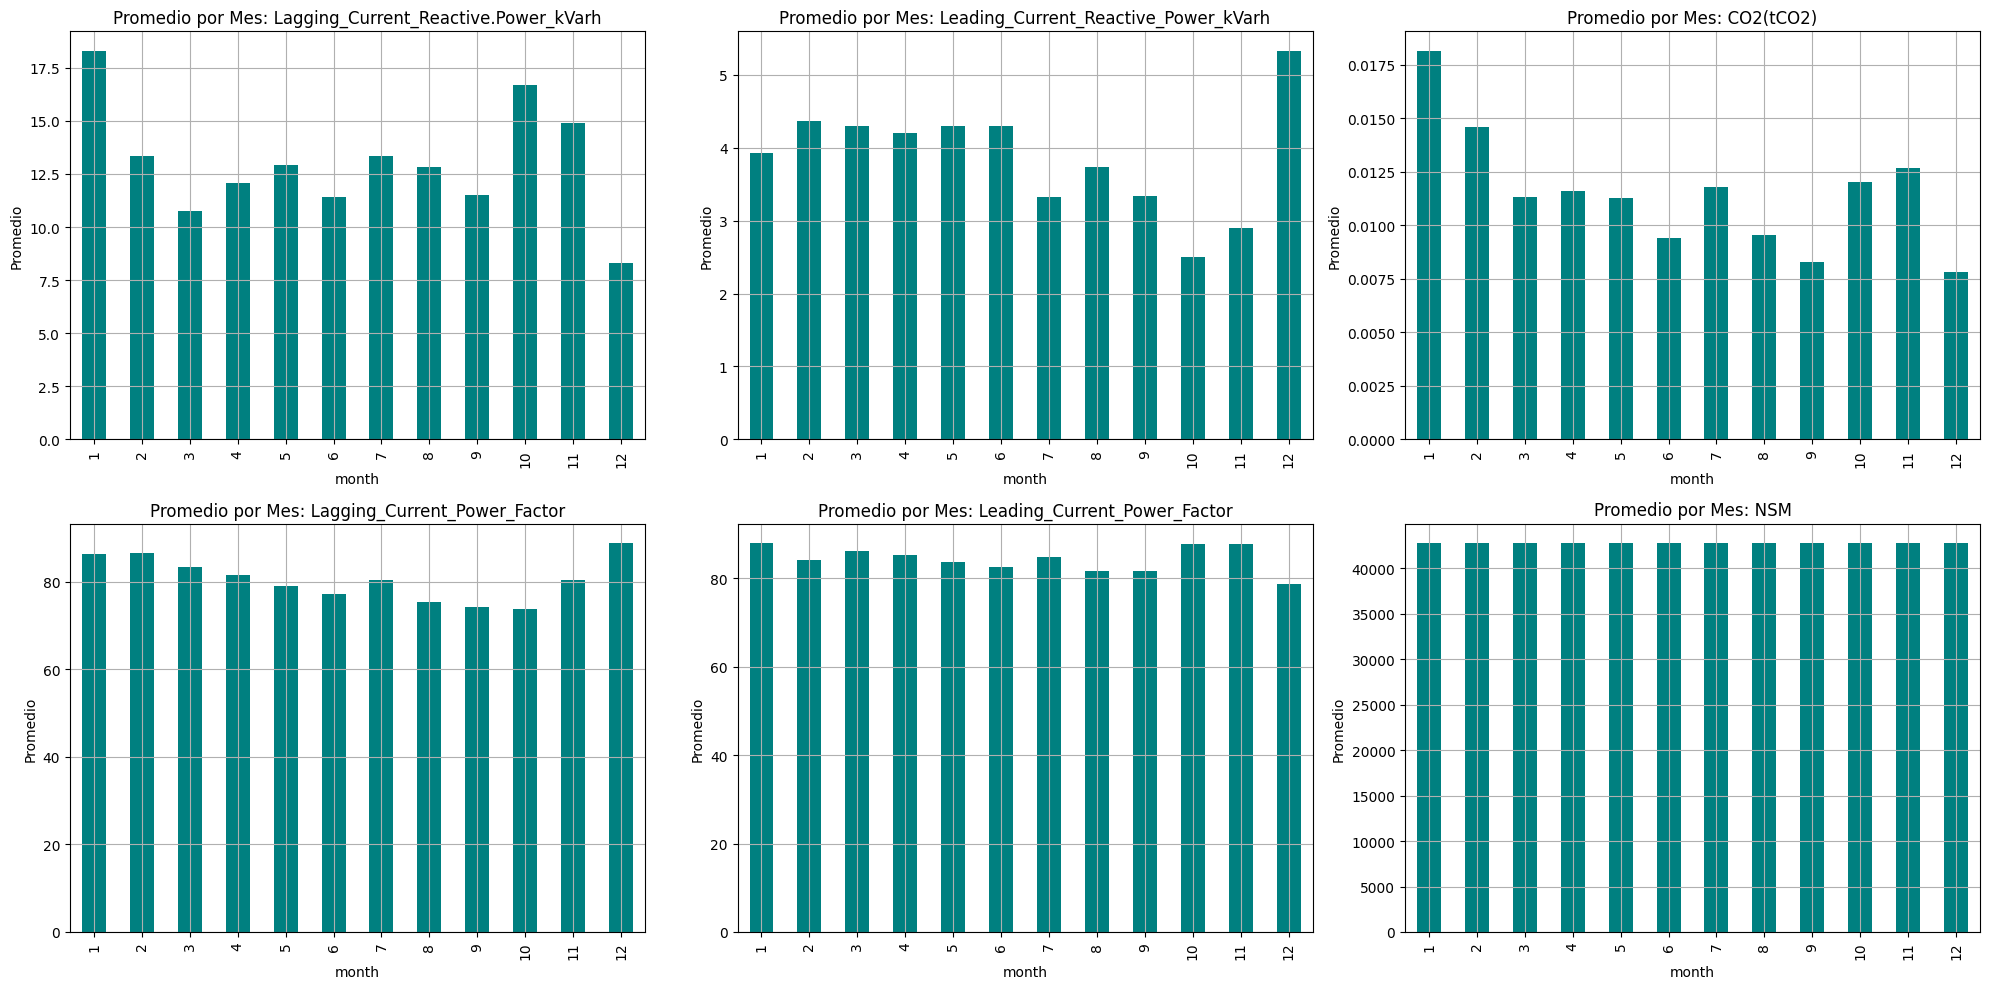

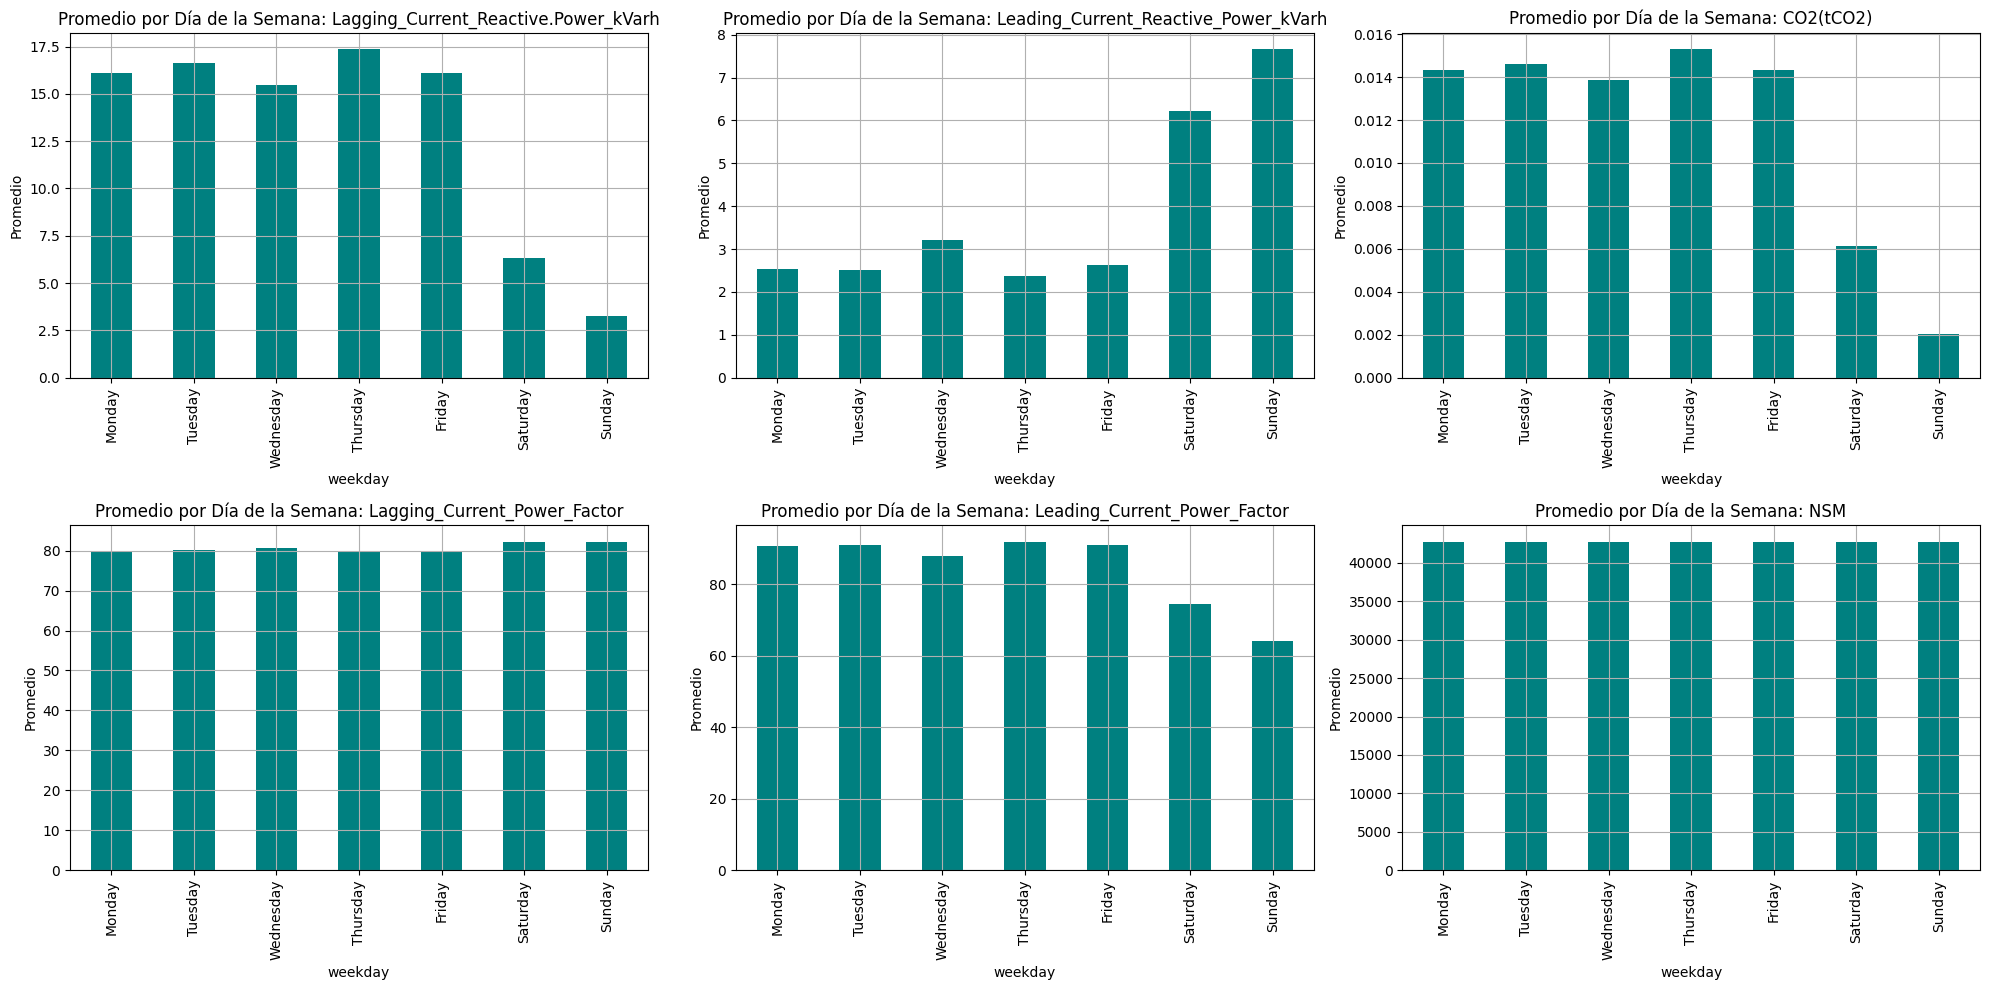

In [ ]:

# Convertir fecha a datetime
df['date'] = pd.to_datetime(df['date'], dayfirst=True)

# Extraer componentes temporales
df['hour'] = df['date'].dt.hour
df['day'] = df['date'].dt.day
df['month'] = df['date'].dt.month
df['weekday'] = df['date'].dt.day_name()

# Variables que quieres analizar
vars_to_plot = [
    'Lagging_Current_Reactive.Power_kVarh',
    'Leading_Current_Reactive_Power_kVarh',
    'CO2(tCO2)',
    'Lagging_Current_Power_Factor',
    'Leading_Current_Power_Factor',
    'NSM'
]

# Función para graficar por agrupación temporal
def plot_by_time_unit(df, time_col, title_prefix):
    fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(20, 10))
    axs = axs.flatten()

    for i, var in enumerate(vars_to_plot):
        grouped = df.groupby(time_col)[var].mean()
        if time_col == 'weekday':
            # Ordenar días de la semana
            ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
            grouped = grouped.loc[ordered_days]
        grouped.plot(kind='bar', ax=axs[i], color='teal')
        axs[i].set_title(f"{title_prefix}: {var}")
        axs[i].set_ylabel("Promedio")
        axs[i].grid(True)

    plt.tight_layout()
    plt.show()

# Gráficos
plot_by_time_unit(df, 'hour', 'Promedio por Hora')
plot_by_time_unit(df, 'day', 'Promedio por Día del Mes')
plot_by_time_unit(df, 'month', 'Promedio por Mes')
plot_by_time_unit(df, 'weekday', 'Promedio por Día de la Semana')


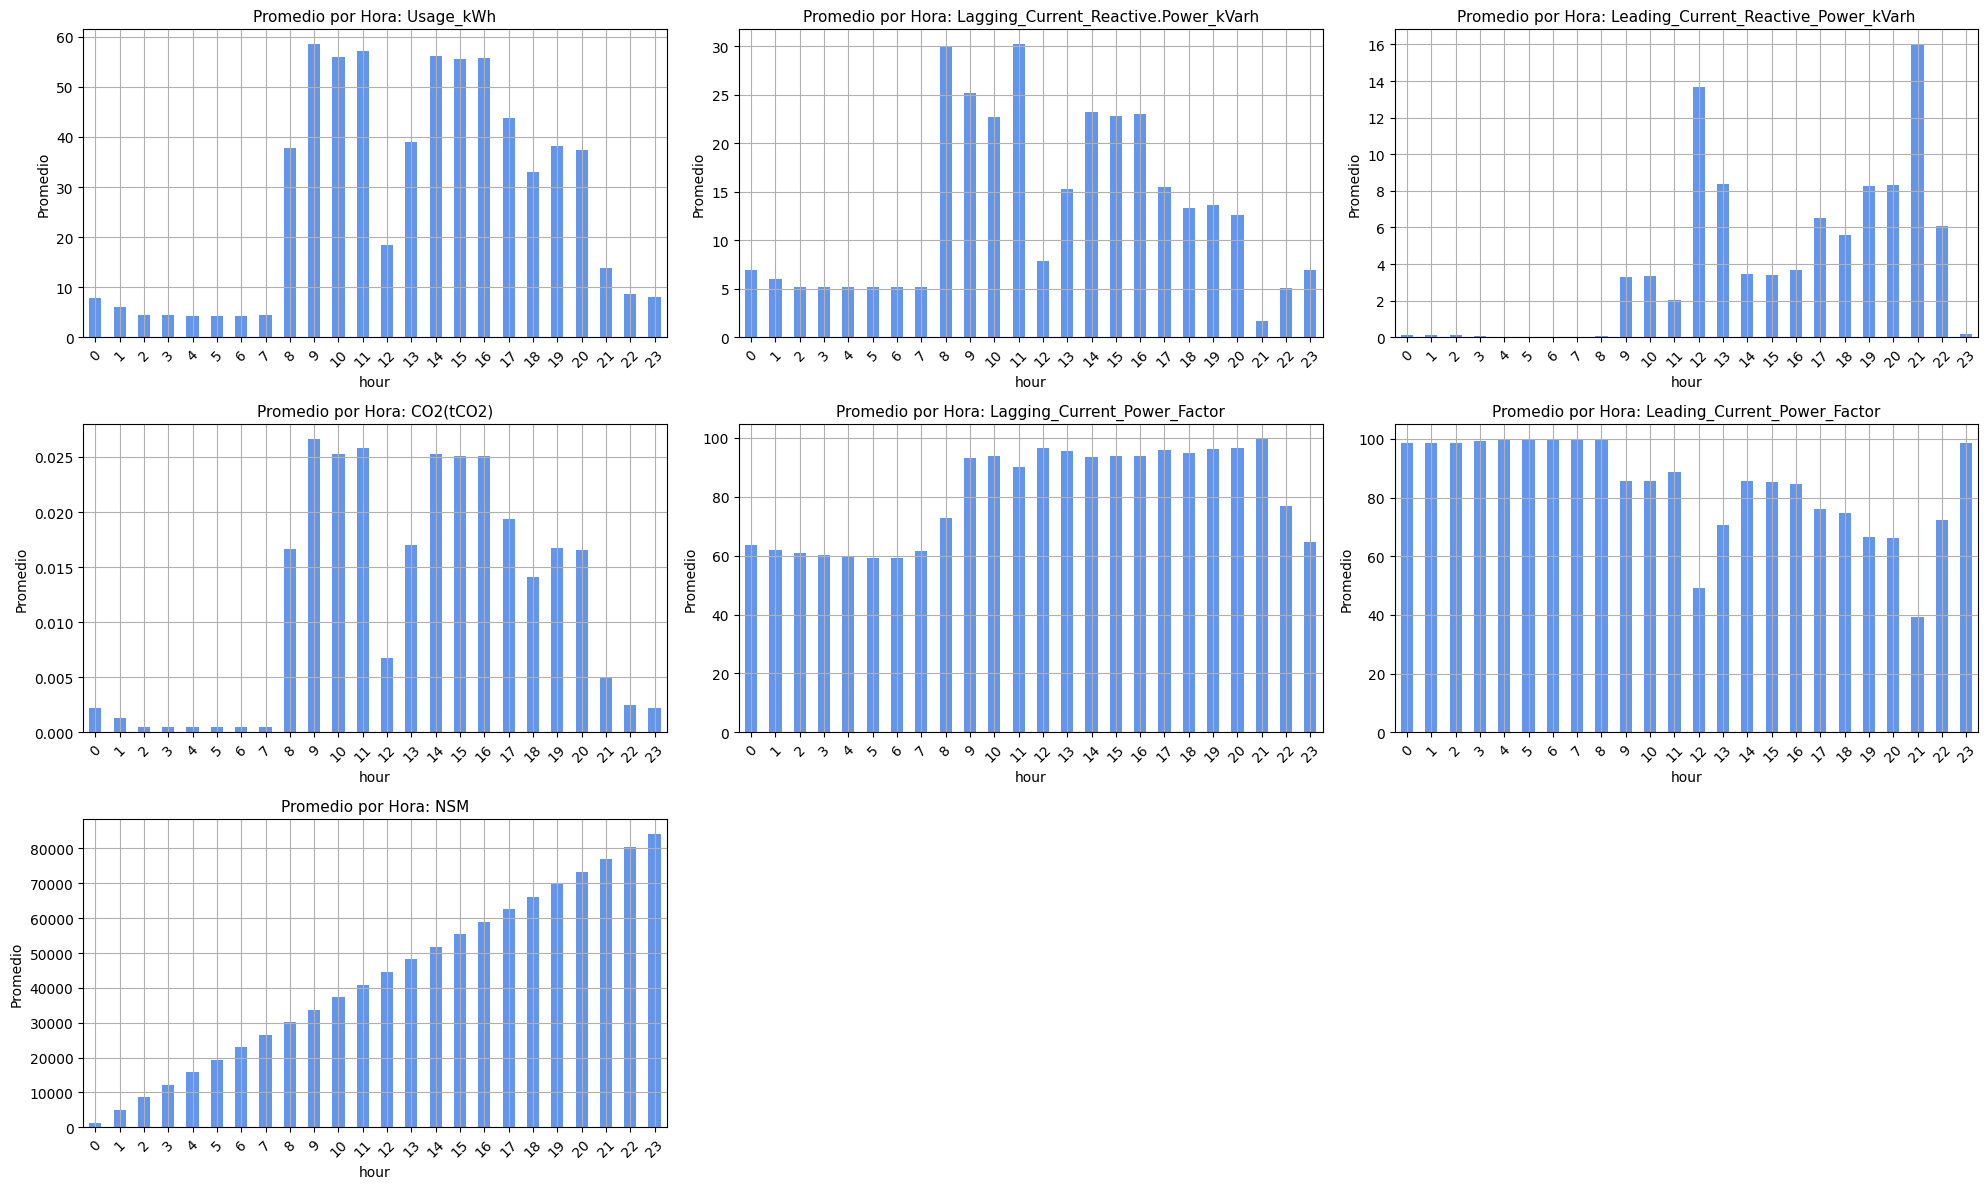

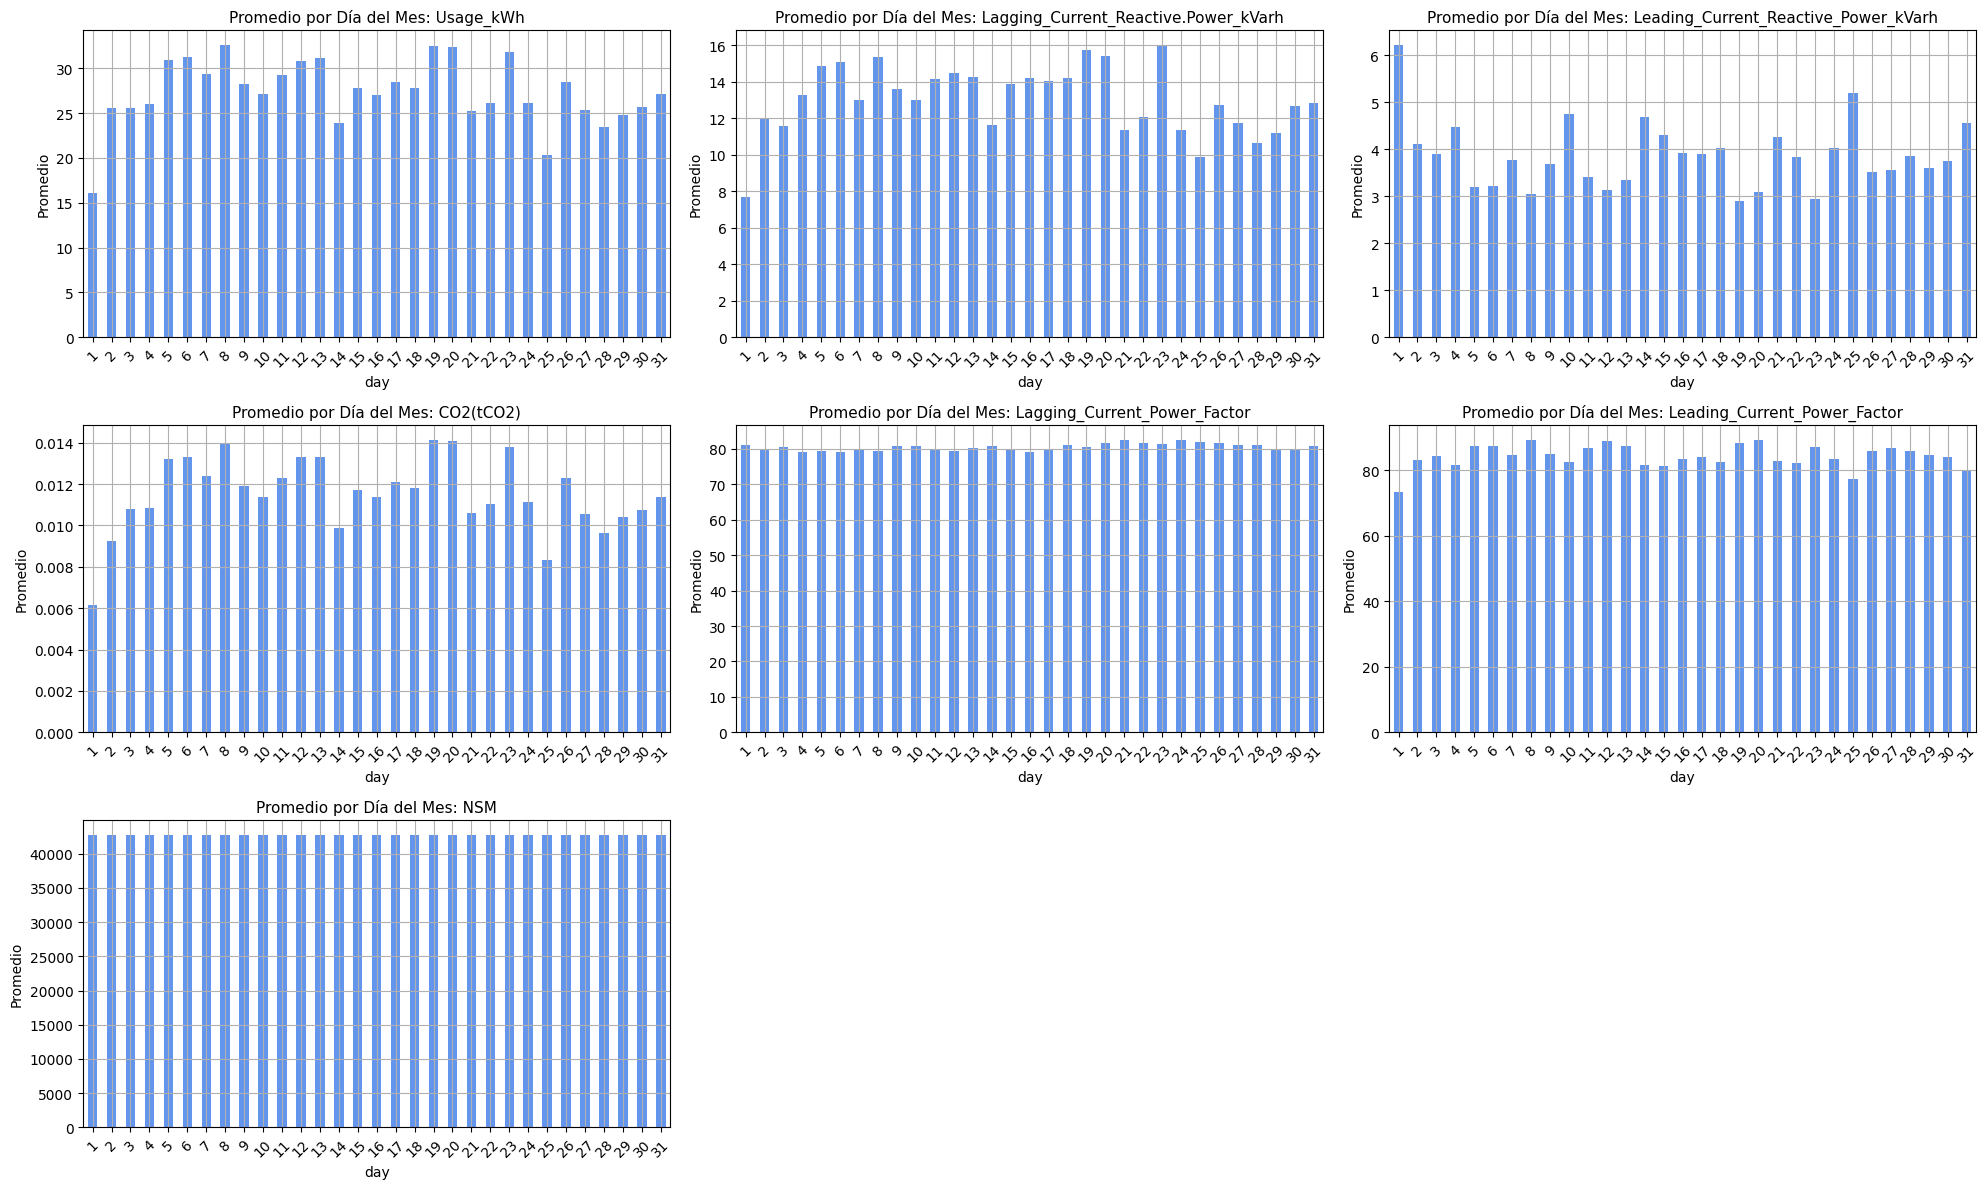

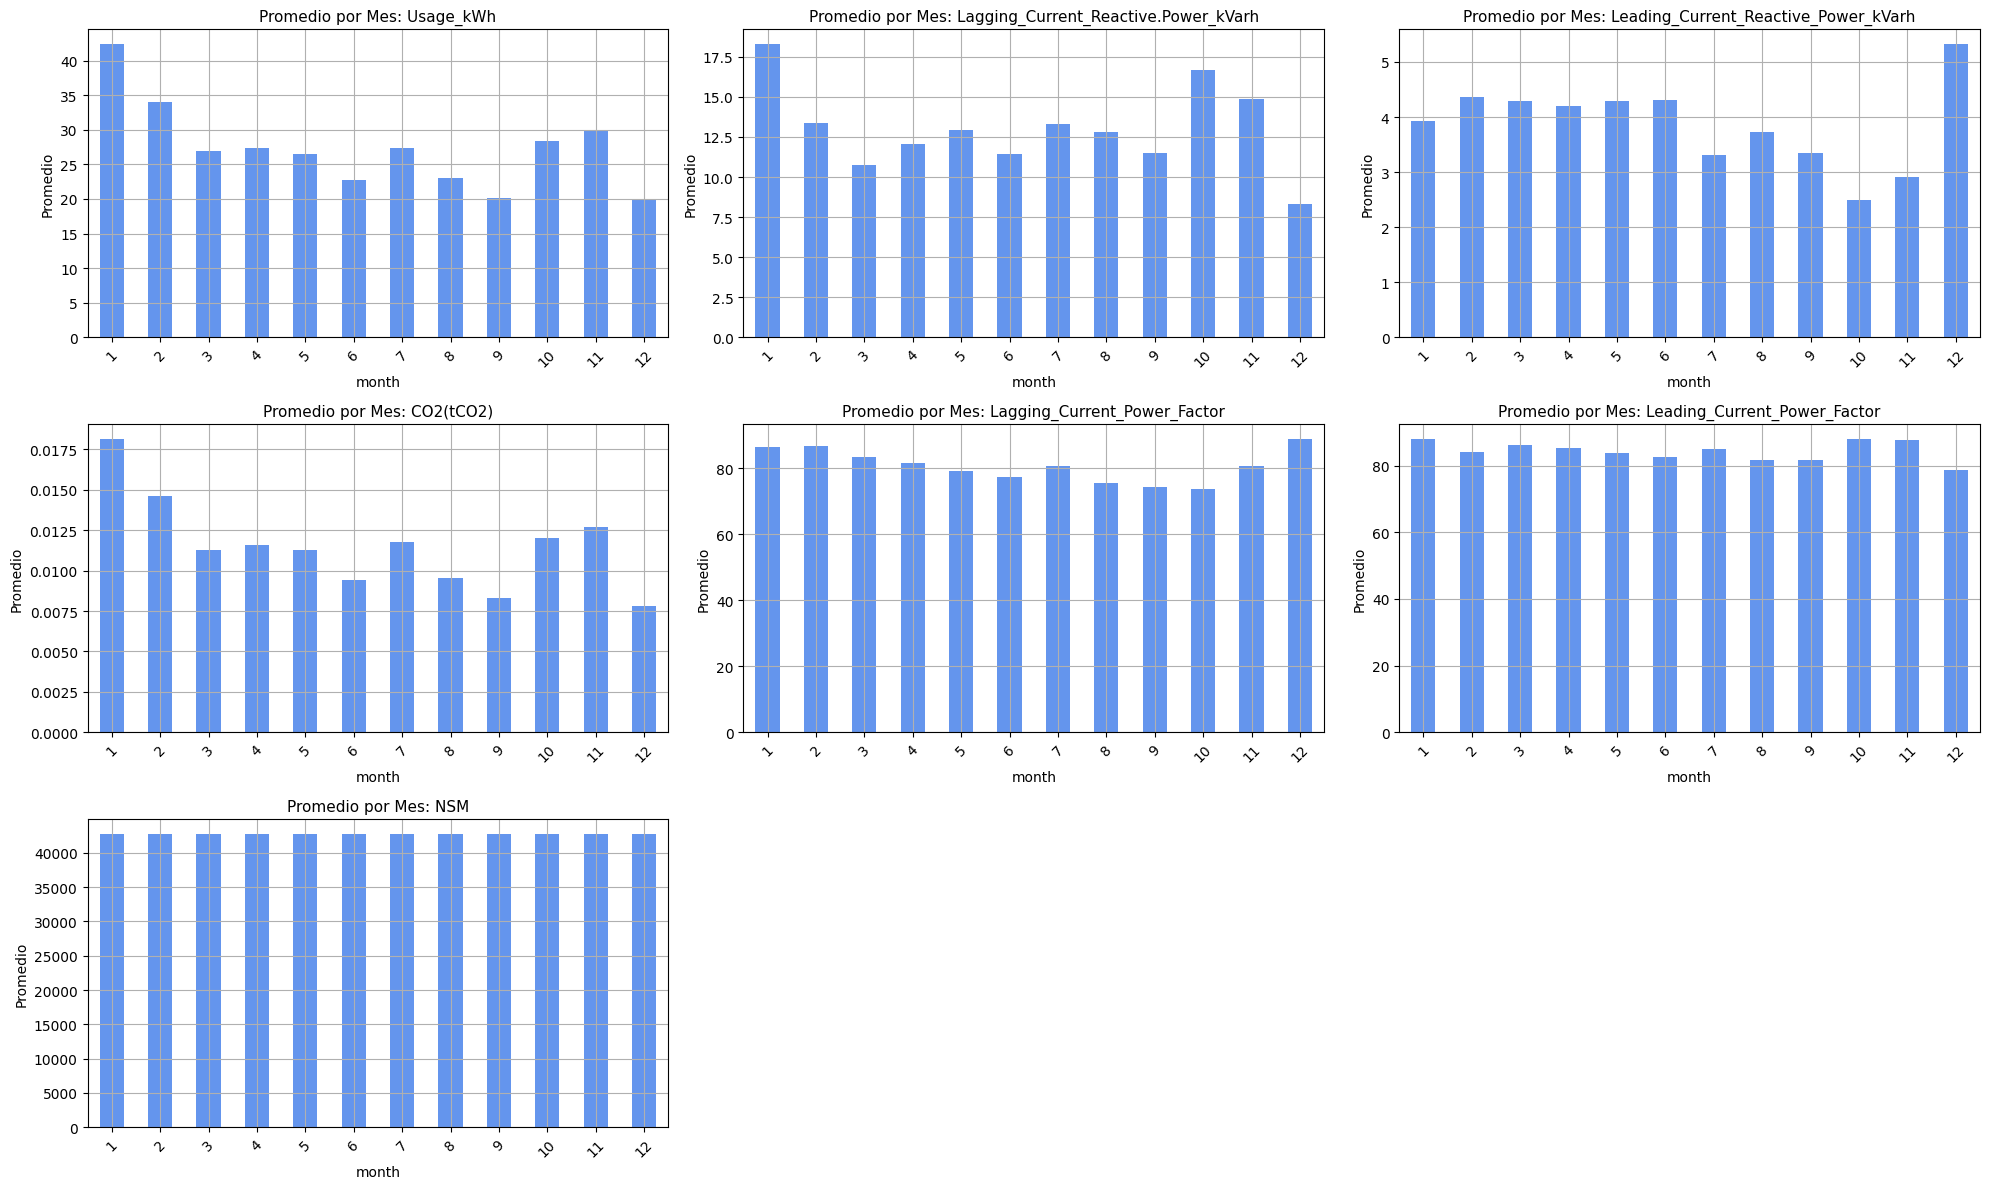

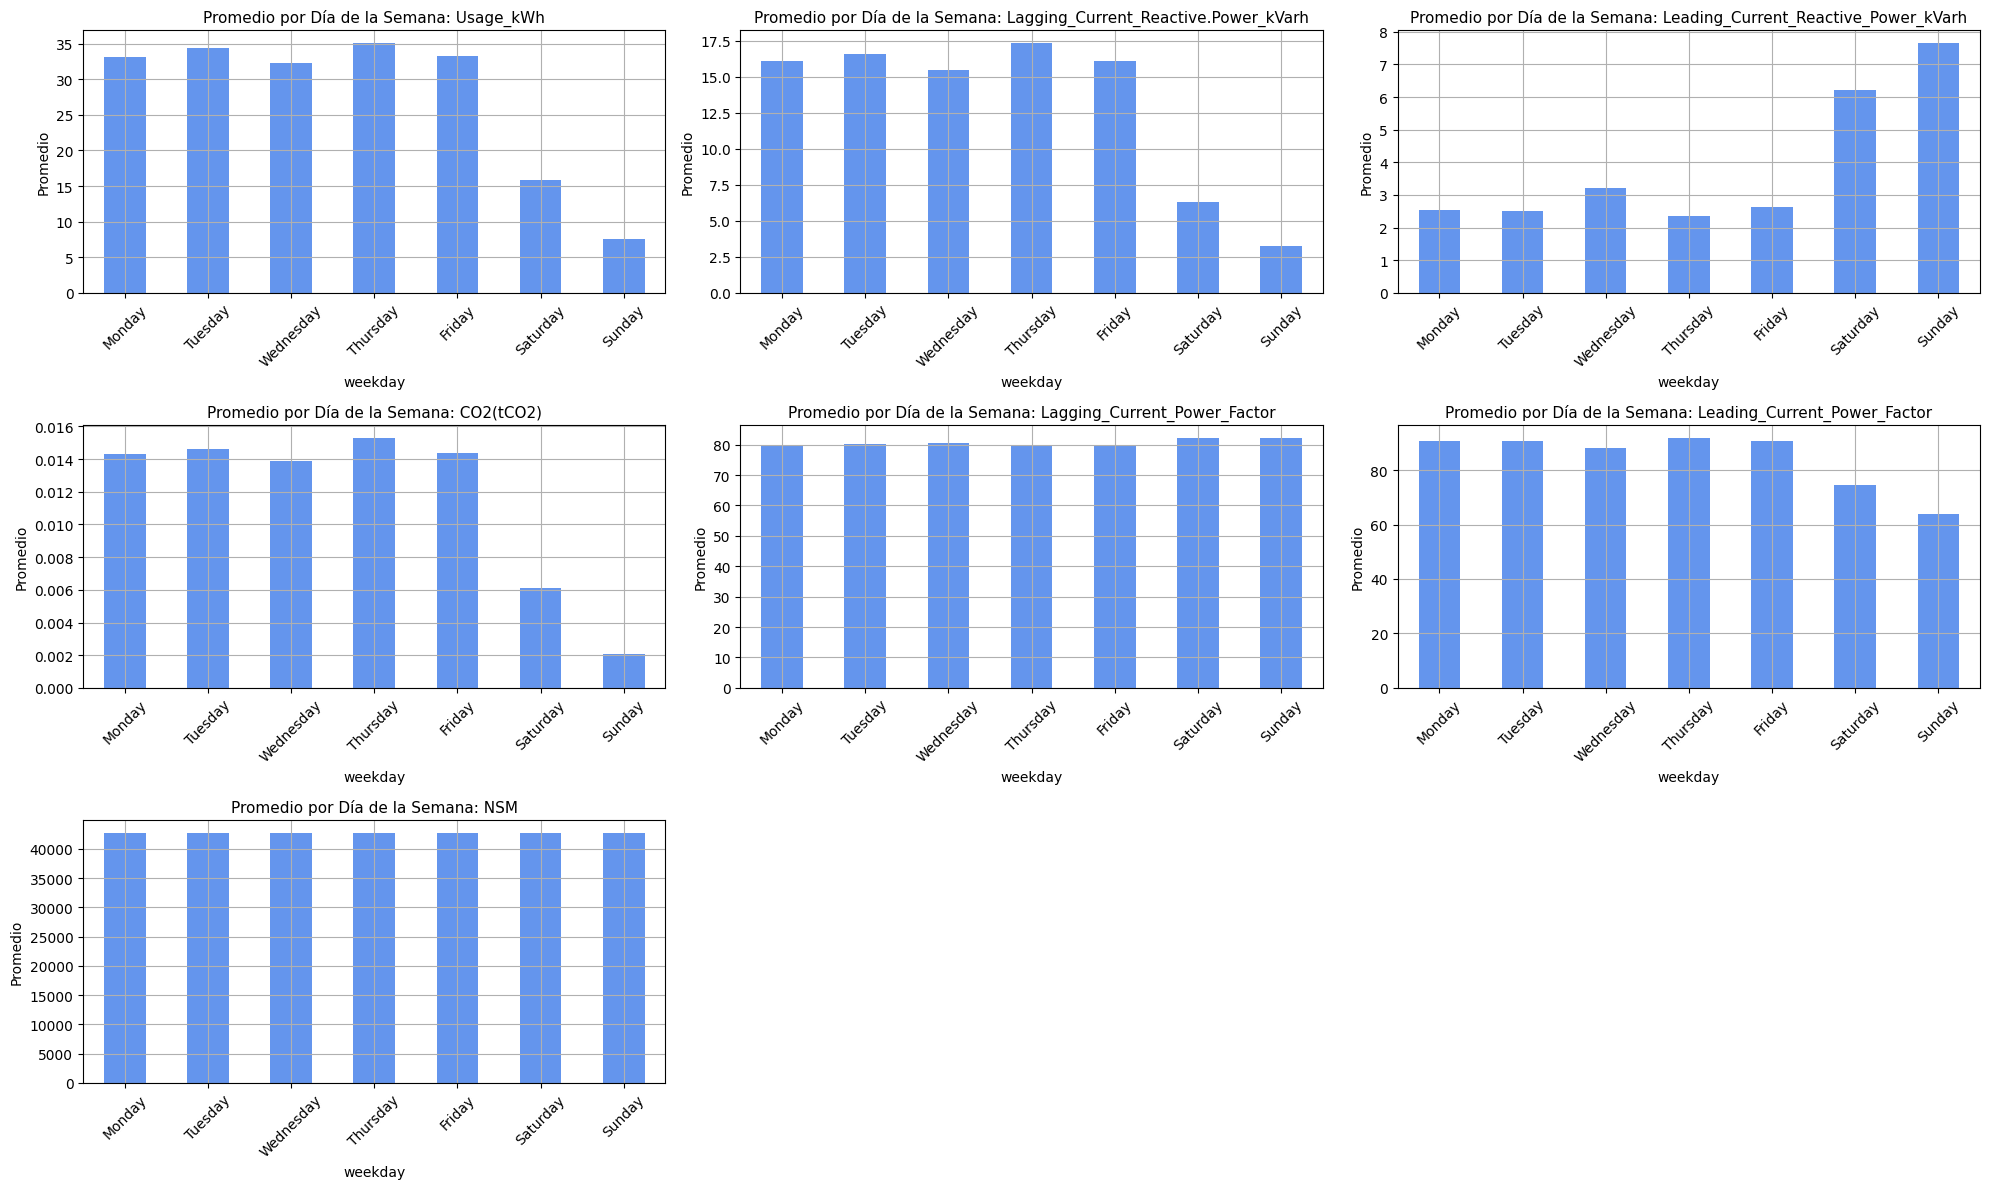

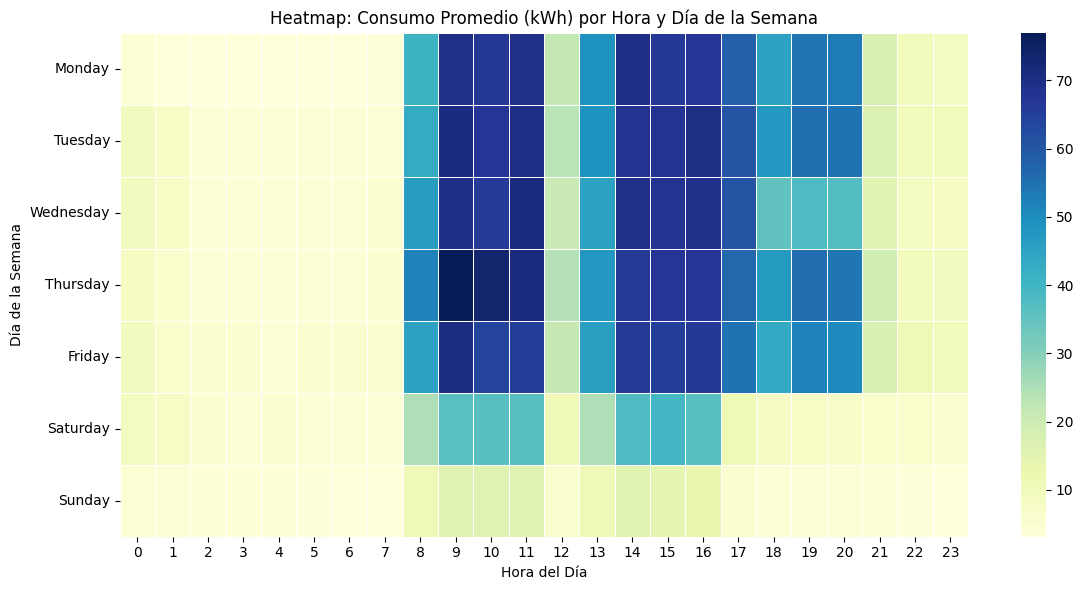

In [ ]:


# 2. Convertir 'date' a tipo datetime y extraer componentes temporales
df['date'] = pd.to_datetime(df['date'], dayfirst=True)
df['hour'] = df['date'].dt.hour
df['day'] = df['date'].dt.day
df['month'] = df['date'].dt.month
df['weekday'] = df['date'].dt.day_name()

# 3. Variables a graficar
vars_to_plot = [
    'Usage_kWh',
    'Lagging_Current_Reactive.Power_kVarh',
    'Leading_Current_Reactive_Power_kVarh',
    'CO2(tCO2)',
    'Lagging_Current_Power_Factor',
    'Leading_Current_Power_Factor',
    'NSM'
]

# 4. Función para graficar por agrupación temporal
def plot_by_time_unit(df, time_col, title_prefix):
    fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(20, 12))
    axs = axs.flatten()

    for i, var in enumerate(vars_to_plot):
        grouped = df.groupby(time_col)[var].mean()
        if time_col == 'weekday':
            ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
            grouped = grouped.loc[ordered_days]
        grouped.plot(kind='bar', ax=axs[i], color='cornflowerblue')
        axs[i].set_title(f"{title_prefix}: {var}", fontsize=11)
        axs[i].set_ylabel("Promedio")
        axs[i].tick_params(axis='x', rotation=45)
        axs[i].grid(True)

    for j in range(len(vars_to_plot), 9):  # limpiar ejes vacíos si hay
        fig.delaxes(axs[j])

    plt.tight_layout()
    plt.show()

# 5. Graficar por hora, día, mes y día de semana
plot_by_time_unit(df, 'hour', 'Promedio por Hora')
plot_by_time_unit(df, 'day', 'Promedio por Día del Mes')
plot_by_time_unit(df, 'month', 'Promedio por Mes')
plot_by_time_unit(df, 'weekday', 'Promedio por Día de la Semana')

# 6. Heatmap de Usage_kWh por hora y día de semana
pivot_heatmap = df.pivot_table(index=df['weekday'], columns='hour', values='Usage_kWh', aggfunc='mean')
ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
pivot_heatmap = pivot_heatmap.reindex(ordered_days)

plt.figure(figsize=(12, 6))
sns.heatmap(pivot_heatmap, annot=False, cmap="YlGnBu", fmt=".1f", linewidths=.5)
plt.title("Heatmap: Consumo Promedio (kWh) por Hora y Día de la Semana")
plt.xlabel("Hora del Día")
plt.ylabel("Día de la Semana")
plt.tight_layout()
plt.show()


               date  Usage_kWh  Lagging_Current_Reactive.Power_kVarh  \
0  01/01/2018 00:15       3.17                                  2.95   
1  01/01/2018 00:30       4.00                                  4.46   
2  01/01/2018 00:45       3.24                                  3.28   
3  01/01/2018 01:00       3.31                                  3.56   
4  01/01/2018 01:15       3.82                                  4.50   

   Leading_Current_Reactive_Power_kVarh  CO2(tCO2)  \
0                                   0.0        0.0   
1                                   0.0        0.0   
2                                   0.0        0.0   
3                                   0.0        0.0   
4                                   0.0        0.0   

   Lagging_Current_Power_Factor  Leading_Current_Power_Factor     NSM  \
0                         73.21                         100.0   900.0   
1                         66.77                         100.0  1800.0   
2                      

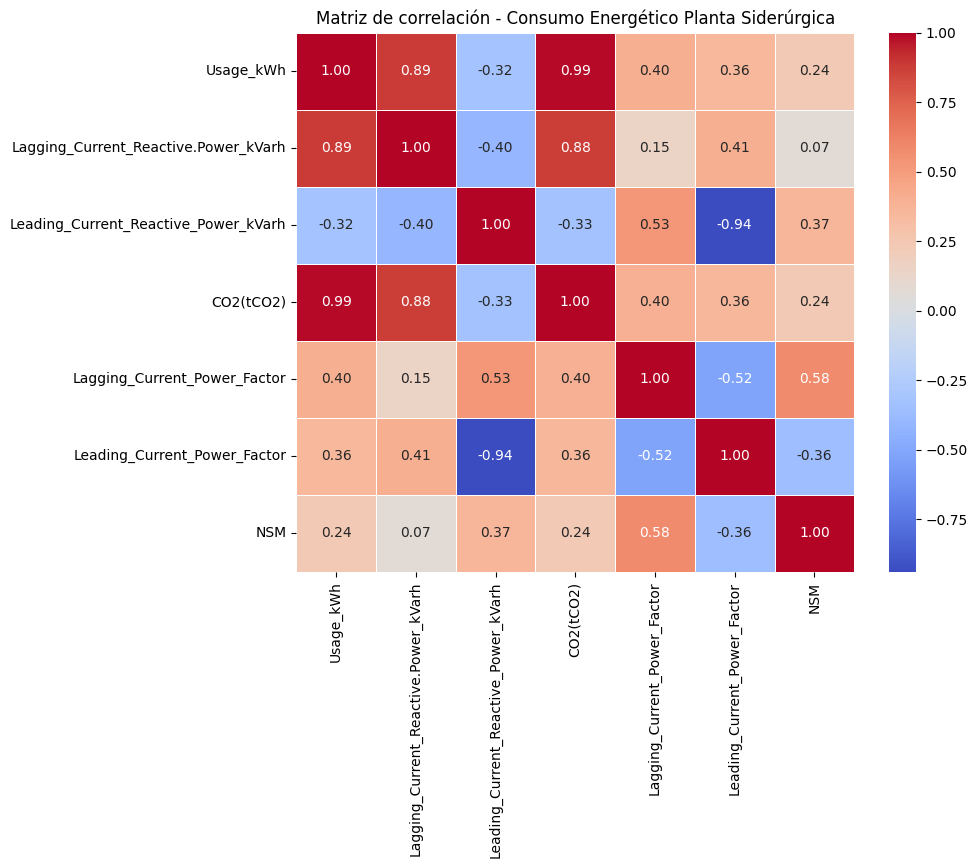

In [ ]:

# 2. Verifica las primeras filas y tipos de variables
print(df.head())
print(df.dtypes)

# 3. Seleccionar solo las variables numéricas de interés
numeric_vars = [
    'Usage_kWh',
    'Lagging_Current_Reactive.Power_kVarh',
    'Leading_Current_Reactive_Power_kVarh',
    'CO2(tCO2)',
    'Lagging_Current_Power_Factor',
    'Leading_Current_Power_Factor',
    'NSM'
]
df_num = df[numeric_vars]

# 4. Calcular la matriz de correlaciones
corr_matrix = df_num.corr()
print(corr_matrix)

# 5. Visualizar con seaborn
plt.figure(figsize=(9, 7))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Matriz de correlación - Consumo Energético Planta Siderúrgica")
plt.show()
